<a href="https://colab.research.google.com/github/reouvenzana/Knowledge/blob/main/Confidence%20Interval%20of%20an%20Exponential%20distribution%20parameter/Confidence%20Interval%20of%20an%20Exponential%20distribution%20parameter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# setwd('path of the directory where is the dataset')
Data2=read.table('estimation2.txt') #a data.frame

In [4]:
head(Data2)

,V1
,<dbl>
1,0.09948529
2,0.01259854
3,0.39906000
4,0.29559020
5,0.10927060
6,0.05857074


In [5]:
dim(Data2)

[1] 5000    1

We have 5,000 observations.

In [6]:
str(Data2)

'data.frame':	5000 obs. of  1 variable:
 $ V1: num  0.0995 0.0126 0.3991 0.2956 0.1093 ...


In [7]:
Data2=as.matrix(Data2)
A2=unique(Data2)

In [8]:
dim(A2)

[1] 4999    1

We see that we have 4999 different values. We consider that this is a continuous variable since the count of each value is approximately equal to 1 (whereas it would be bigger if the variable was discrete).

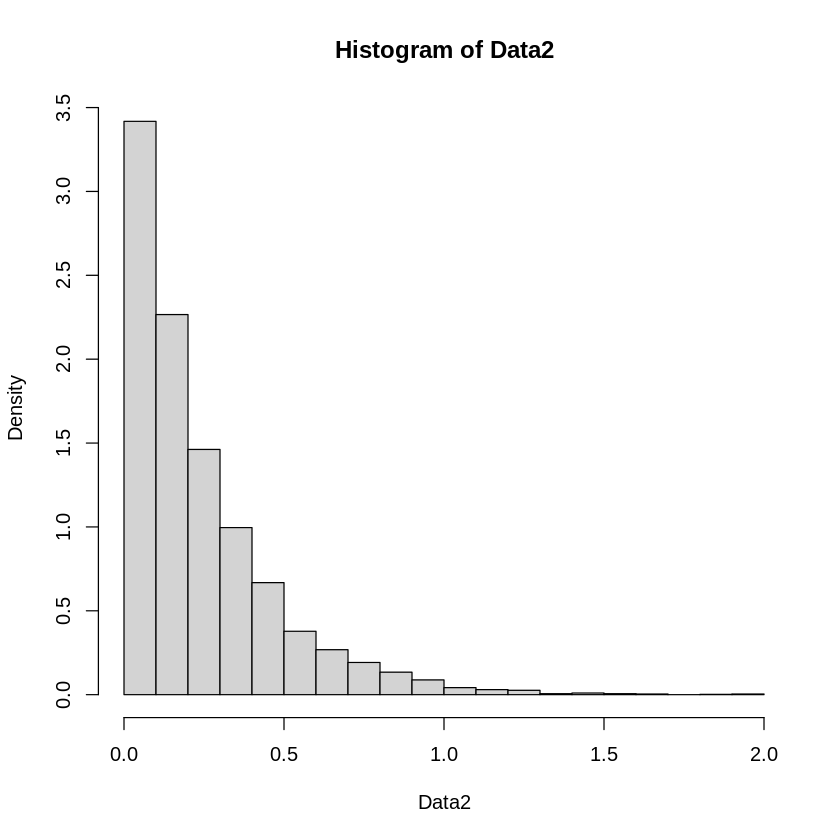

In [9]:
hist(Data2,freq=FALSE) #we precise freq=FALSE to have the density on the Y-axis

By looking the histogram it looks like a **exponential distribution**.
To get a better grasp, we can plot on the histogram the density of the exponential distribution associated with it.

To do so, we have to **estimate** the lambda parameter.

Let's consider $X \sim \mathcal{E}(\lambda)$.

We have $E[X]=\frac{1}{\lambda}$.

Using method of moments, we have $\hat \lambda_n = \frac{1}{\bar X_n}$.

Though, $\hat \lambda_n$ cannot be written as the sum of random variables. It makes it harder to construct a confidence interval for $\lambda$.

In [10]:
lambdah=1/mean(Data2)

We supperpose the histogram and the density of its associated gaussian

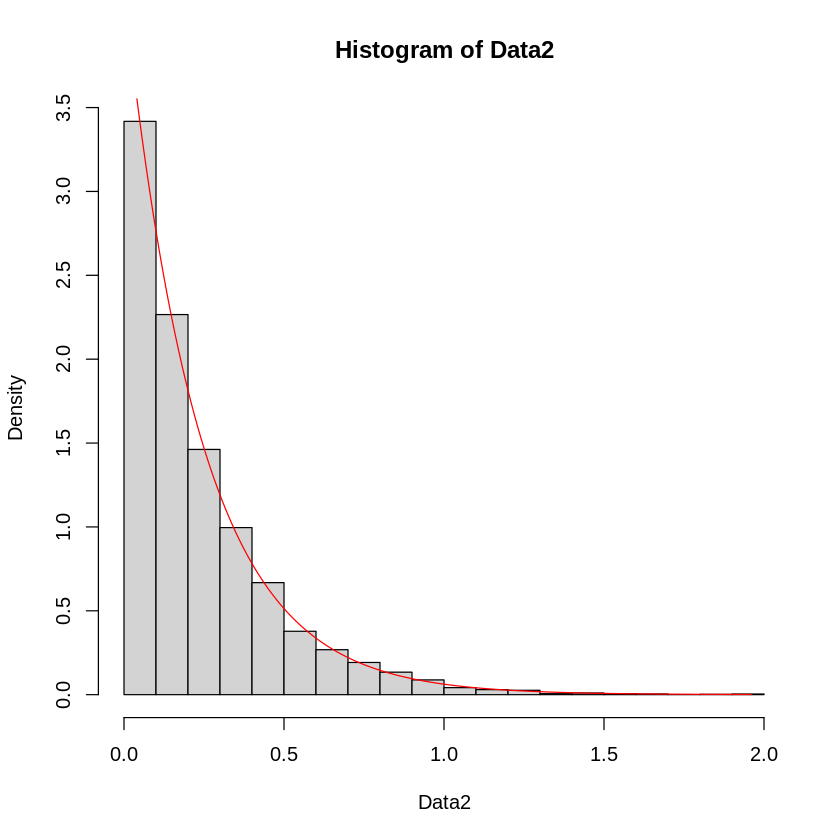

In [29]:
m=min(Data2)
M=max(Data2)
x=seq(m,M+0.015,0.01) #we add 0.15 to make sure that M appears
y=dexp(x,lambdah)
H=hist(Data2,freq=FALSE,breaks=20)
lines(x,y,col='red')


We'll modify the breaks a little to divize the first class.

In [35]:
l=c(H$breaks[1],H$breaks[1]+1/3*(H$breaks[2]+H$breaks[1]),H$breaks[1]+2/3*(H$breaks[2]+H$breaks[1]),H$breaks[2:length(H$breaks)])

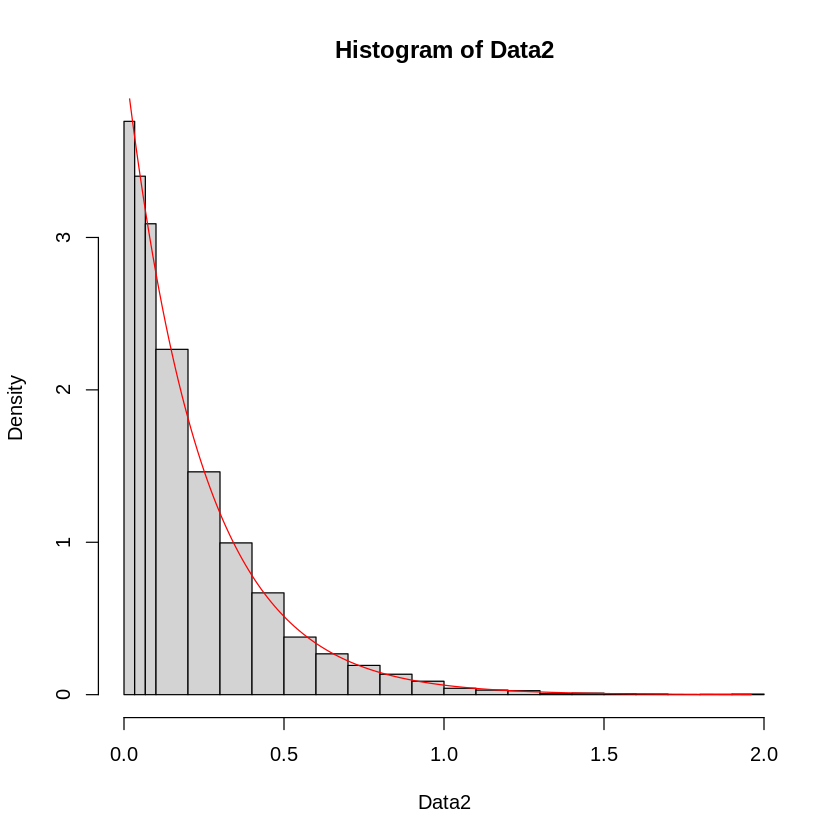

In [39]:
H=hist(Data2,freq=FALSE,breaks=l)
lines(x,y,col='red')

## Cumulative Distribution Function


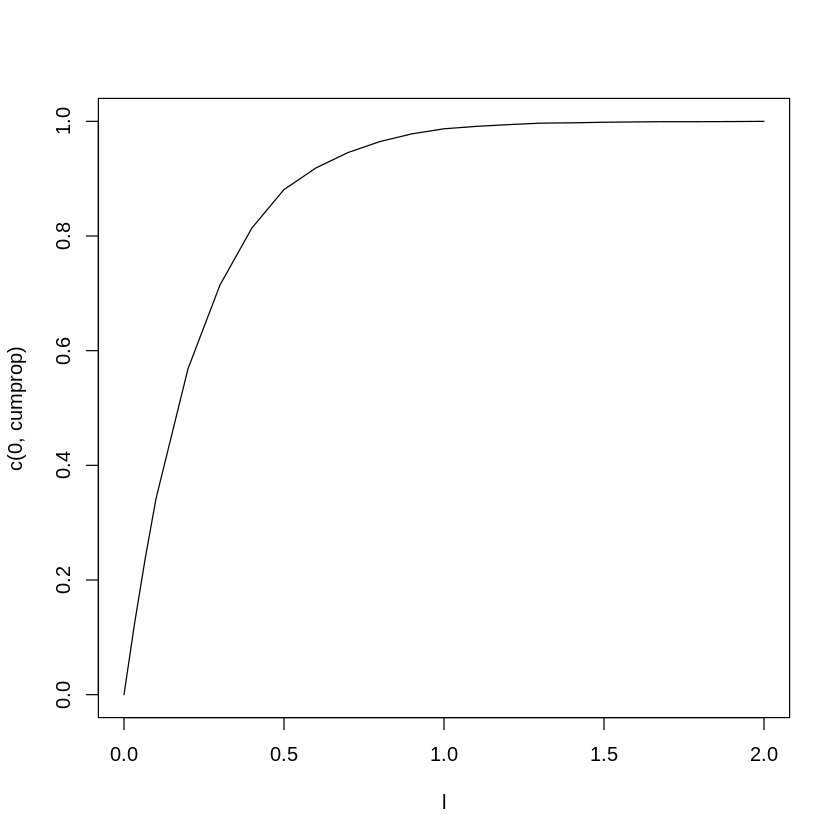

In [49]:
prop=H$counts/nrow(Data2) #proportions of each class, which is n_class/n
cumprop=cumsum(prop) #cumulative proportions
plot(l,c(0,cumprop),type='l') #we must add 0 so both vectors (x and y) have the same lenght (cumprop is shorter than l by 1).

Or we can use the **empirical distribution function**. Here we compare the two, the empirical distribution being in red. Observe (zoom) that they do not exactly match.That's because the CDF relies on the classes we used.

In general, we prefer using the EDF.

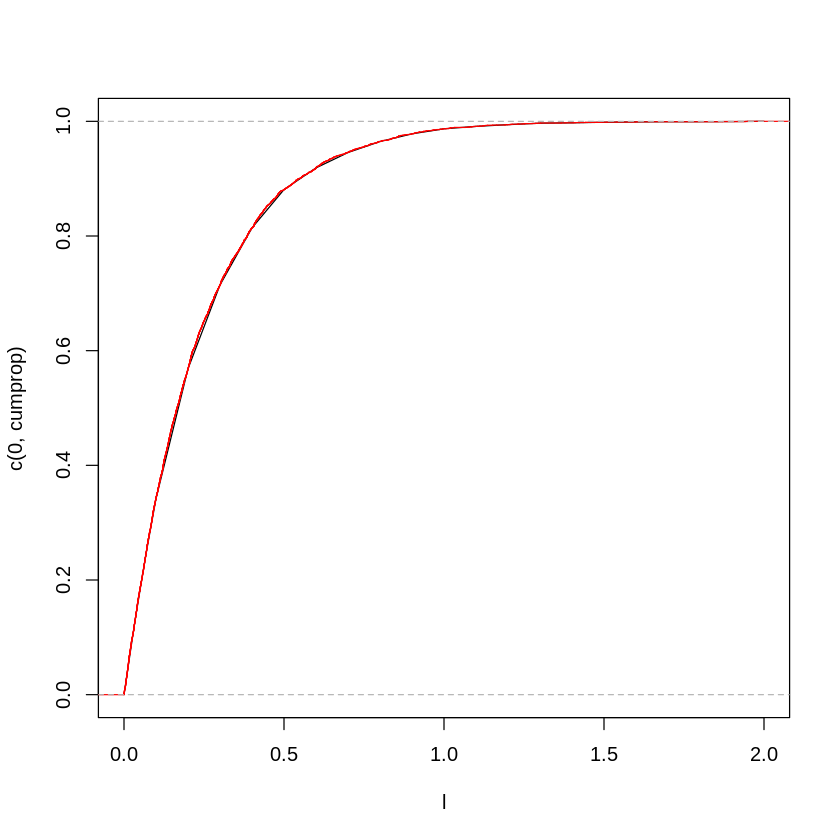

In [53]:
plot(l,c(0,cumprop),type='l') #we must add 0 so both vectors (x and y) have the same lenght (cumprop is shorter than l by 1).
lines(ecdf(Data2),col="red")

According to these graphs, an exponential distribution seems a good fit. To be sure, we would have to perform a test.

Here, we will simply construct a confidence interval for the expectation estimator, for $\alpha = 0.05$. We're in the case of a gaussian random variable, where $\sigma$ is unknown.

Hence we use the following formula:

$$
\left[\overline{X}_{n} -\frac{\hat{\sigma }_{n-1}}{\sqrt{n}} z_{n-1,1-\alpha _{2}} ,\overline{X}_{n} +\frac{\hat{\sigma }_{n-1}}{\sqrt{n}} z_{n-1,1-\alpha _{1}}\right]
$$



In [ ]:
alpha=0.05
n=nrow(Data2)
lCI=muh-sqrt(vh)/sqrt(n)*qt(1-alpha/2,n-1) #lower bound
uCI=muh+sqrt(vh)/sqrt(n)*qt(1-alpha/2,n-1) #higher bound

In [ ]:
lCI

,V1
V1,0.6458558


In [ ]:
uCI

,V1
V1,0.7402
